In [68]:
import random
import numpy as np
import matplotlib.pyplot as plt
import operator as op
from functools import reduce

In [69]:
# I want to develop a test to check if a random number generator produces a uniform distrubition
# I want to do this because I want to make a test for a specific distrubition but simplifying first for insight

# I will do this by creating bins, each of width delta_x.
# If a points falls between the endpoints of a bin, it will be added to list containing all points where this is true.
# Then I will divide the list size of each bin (the frequency of each bin) by the total number of points calculated.
# This will provide me with the relative frequency of each interval.
# Once this is done, a graph can be printed for an intuitive (but possible errors) check

# However, I want more of a rigorious check, but will not continue down that path until intuitive check is possible


# this method plots a generator on a histogram w/ specified interval length and points generated
#
# @param (int) bin_count - this is the number of bins/intervals to include in the histogram
#
# @param (int) samples - this is the number of points to be calculated by the generator
#
#
#
def testRandom(bin_count, sample_count):
    bins = []
    points = []
    
    # bins ranges from 0 to 1
    for i in range(0, bin_count):
        bins.append(i / bin_count)
    
    for i in range(sample_count):
        points.append(random.random())
    
    plt.hist(points, histtype='bar', bins=bins)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('random.random()')
    # now that bins are calculated, need list of sample points, then graph and histogram will produce
    # also want to see how to graph relative frequency

    
    

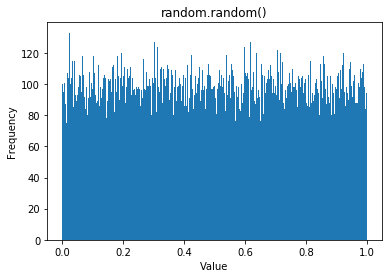

In [70]:
bin_count = 1000
sample_count = 100000
testRandom(bin_count, sample_count)

In [71]:
# this function was copied from stack overflow
# it calculates the value of nCr (n choose r)
#
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2


# this function returns probability of p being the long-term frequency of a given event, A, occuring given outcomes (k,m)
#
# @param (int) n - this is the number of times a measurement is made
#
# @param (int) k - this is the number of times event A is measured
#
# @param (float) p - this is the probabilitiy of event A being measured
#
# @return (float) w - this is the probability that p produces the measured set of outcomes
#
# constraints:
# 0 < k <= n
# 0 <= p <= 1
# 0 <= w <= 1
#
def weight(n, k, p):
    # probability(p) = probability(measuring k out of n measurments)
    # probability(measuring k out of n) = probability(measuring one permutation of k out of n) * (number of ways to measure k out of n)
    # probability(measuring one permutation of k out of n) = (p^k)(1-p)^(n-k)
    # number of ways = math.comb(n, k)
    
    weight = (p ** k) * ((1 - p) ** (n - k)) * ncr(n, k)
    return weight

# this function does the same as weight, but takes in a list and returns a list instead of a single value
#
# @param (int) n - this is the number of times a measurement is made
#
# @param (int) k - this is the number of times event A is measured
#
# @param (list) values - these are the selected values to be given a weight
# example: values = [0, 0.1, 0.2, ..., 0.9, 1]
#
# @return (list) weights - this is the list of weights for the corresponding list of values
#
def calcWeights(n, k, values):
    # this function takes in a list of values to get weights
    weights = []
    for i in range(len(values)):
        weights.append(weight(n, k, values[i]))
    return weights

# this function normalizes the list of weights, ie changes values of weights such that the sum of weights is 1
#
# @param (list) weights - this the list of weights for the corresponding list of values
#
# @return (list) normal_weights - this is equal to weights but every element is divided by the sum of all the elements
#
def normalize(weights):
    normalization_constant = sum(weights)

    normal_weights = []
    for i in range(len(weights)):
        normal_weight = weights[i] / normalization_constant
        normal_weights.append(normal_weight)
    
    return normal_weights


# this function takes in an interval and a step size and returns a list of values each incremented by the step size
#
# @param (float) step_size - this is how much each neighboring value in the list differs by
#
# @param (float) lower_bound - this is the lower_bound of the values
# default: lower_bound=0
#
# @param (float) upper_bound - this is the upper_bound of the values
# default: upper_bound=1
#
# @return (list) values - this is the list of values between the lower and upper bound with increments equal to step_size
# 
def createValues(step_size, lower_bound=0, upper_bound=1):
    values = []
    
    step_count = int((upper_bound - lower_bound) / step_size)
    
    for i in range(step_count):
        value = lower_bound + i * step_size
        values.append(value)
    
    return values

# need step size (may make constant in future), n, and k
# output is 'random number'
#
# @param (float) step_size - this is how much each neighboring value in the list differs by
#
# @param (int) n - this is the number of times a measurement is made
#
# @param (int) k - this is the number of times event A is measured
#
def randomProb(step_size, n, k):
    values = createValues(step_size)
    weights = calcWeights(n, k, values)
    normal_weights = normalize(weights)
    prob = np.random.choice(values, p=normal_weights)
    return prob

randomProb(0.1, 10, 3)
# now want to plot histogram for this    
    




0.5

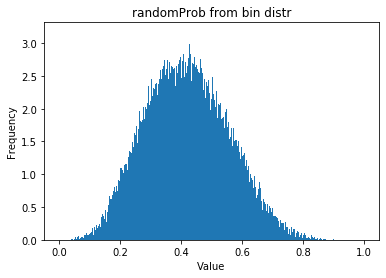

In [74]:
def randomProbHist(sample_count, step_size, n, k):
    values = createValues(step_size)
    weights = calcWeights(n, k, values)
    normal_weights = normalize(weights)
    random_numbers = []
    for i in range(sample_count):
        random_number = np.random.choice(values, p=normal_weights)
        random_numbers.append(random_number)
    
    plt.hist(random_numbers, density=True, histtype='bar', bins=values)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('randomProb from bin distr')
        
sample_count = 100000
step_size = 0.001
n = 10
k = 4


randomProbHist(sample_count, step_size, n, k)

In [ ]:
# sim for prob of prob testing
# input (team A Ft (k1/n1), and team B FT (k2/n2)))
# Output is histogram of spread
#
# how to get a histogram of spread
# i would need to simulate (lets say 10000) spreads
# how do i simulate a spread
# i simulate a game of ft's, then subtract team A score from team B score
# how do i simulate a game of ft's?
# what is a game of ft's
# A game of ft's, team A shoots n (lets say 10) fts, then team B shoots 10 free throws
# if a team makes a ft, they get 1 point
# How do i simulate a game of ft's?
# What is a simulation?
# It is a type of method?
# What is input for method?
# Input is data, / initial Game object?
# What data is given?
# We have team A's # of FTs taken, and # of FTs made
# We have the same for team B
# What is the output for method?
# Final game object/many final game objects?
#
# Input data: 37/60 free throws made for team A
# 31/40 free throws made for team b
#
